In [65]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, widgets
from matplotlib.patches import Rectangle

In [3]:
matplotlib.rcParams['figure.figsize'] = 40, 20

In [4]:
img = Image.open("ifsa_logo_bag.png")

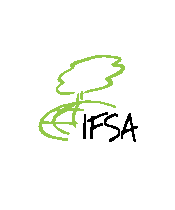

In [4]:
img

In [5]:
img_a = np.array(img)

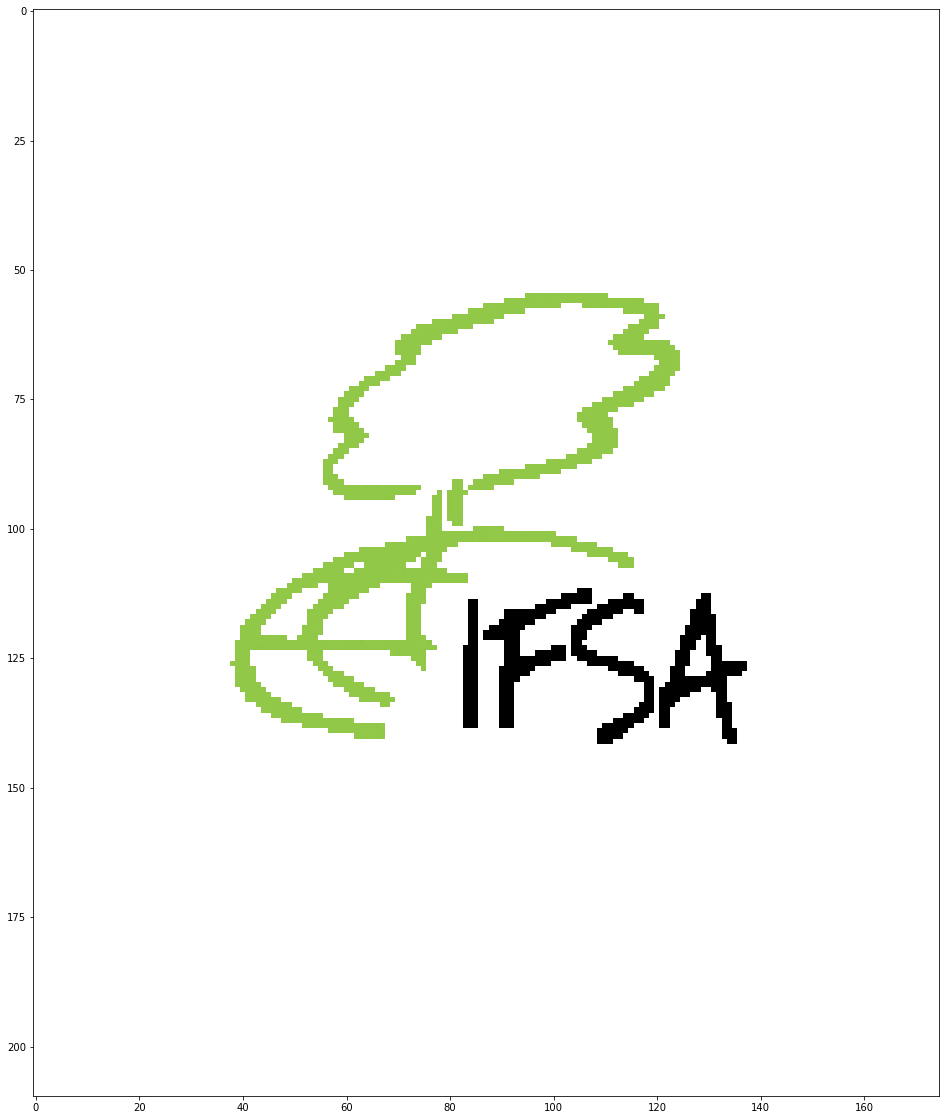

In [9]:
plt.imshow(img_a)

In [ ]:
for i in range(100):
    plt.subplots(1,1)[1].imshow(img_a[i,:,])
    

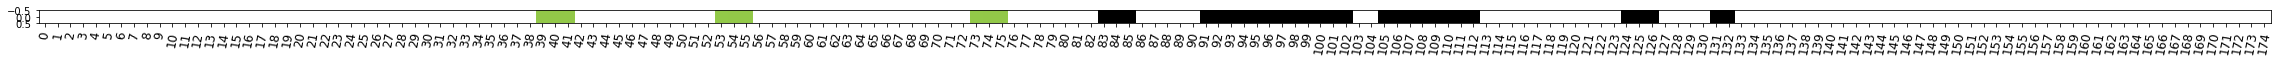

In [27]:
fig, ax = plt.subplots(1,1)
ax.imshow(img_a[125:126,:,])
ax.set_xticks(range(175));
ax.xaxis.set_tick_params(rotation=80, labelsize='large')

In [14]:
Image.fromarray(img)

ModuleNotFoundError: No module named 'interact'

In [117]:
def plot_lines(l, before=5, after=5):
    fig, ax = plt.subplots(1,1)
    
    for i in range(175):
        ax.axvline(i+.5, color='grey', alpha=.7, lw=.8)
    for i in range(0, before+after+1):
        ax.axhline(i+.5, color="grey", alpha=.7, lw=.8)
    
    
    i = 210 - l # need to invert image direction 
    ax.imshow(img_a[i-after:i+before+1,:,])
    
     
    ax.set_yticks(range(0, before+after+1))    
    locs,labels = plt.yticks()
    plt.yticks(locs, map(lambda x: (l+after)-x, locs))
    ax.yaxis.set_tick_params(labelsize='large')
    
    ax.set_xticks(range(175));
    ax.xaxis.set_tick_params(rotation=80, labelsize='large')
    
    rect = Rectangle((0, after-.5), 175, 1, lw=2, color="red", fill=False)
    ax.add_patch(rect)
    
    ax.set_title(f"line n {l}")

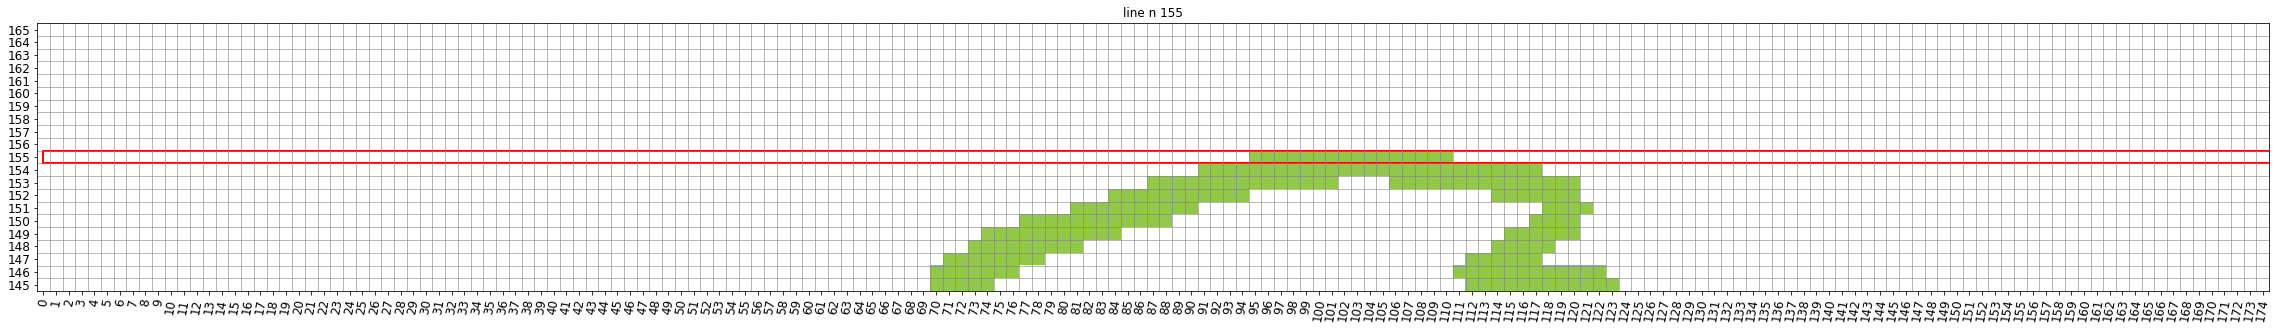

In [118]:
plot_lines(155, 10,10)

In [119]:
interact(plot_lines, l=range(210), before=range(15), after=range(15))

interactive(children=(Dropdown(description='l', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

<function __main__.plot_lines(l, before=5, after=5)>

In [57]:
cols = img_a.sum(axis=1).sum(axis=1)

In [66]:
np.array(list(zip(cols!=133875, range(210))))

array([[  0,   0],
       [  0,   1],
       [  0,   2],
       [  0,   3],
       [  0,   4],
       [  0,   5],
       [  0,   6],
       [  0,   7],
       [  0,   8],
       [  0,   9],
       [  0,  10],
       [  0,  11],
       [  0,  12],
       [  0,  13],
       [  0,  14],
       [  0,  15],
       [  0,  16],
       [  0,  17],
       [  0,  18],
       [  0,  19],
       [  0,  20],
       [  0,  21],
       [  0,  22],
       [  0,  23],
       [  0,  24],
       [  0,  25],
       [  0,  26],
       [  0,  27],
       [  0,  28],
       [  0,  29],
       [  0,  30],
       [  0,  31],
       [  0,  32],
       [  0,  33],
       [  0,  34],
       [  0,  35],
       [  0,  36],
       [  0,  37],
       [  0,  38],
       [  0,  39],
       [  0,  40],
       [  0,  41],
       [  0,  42],
       [  0,  43],
       [  0,  44],
       [  0,  45],
       [  0,  46],
       [  0,  47],
       [  0,  48],
       [  0,  49],
       [  0,  50],
       [  0,  51],
       [  0,

In [58]:
cols[0]

133875